In [11]:

import numpy as np
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [12]:

# Historical game data between Cubs and White Sox
crosstown_games = [
    {"date": "2023-07-25", "cubs_score": 7, "white_sox_score": 3},
    {"date": "2023-07-26", "cubs_score": 10, "white_sox_score": 7},
    {"date": "2023-08-16", "cubs_score": 4, "white_sox_score": 3},
    {"date": "2024-06-04", "cubs_score": 7, "white_sox_score": 6},
    {"date": "2024-06-05", "cubs_score": 7, "white_sox_score": 6},
    {"date": "2024-08-09", "cubs_score": 7, "white_sox_score": 6},
    {"date": "2024-08-10", "cubs_score": 3, "white_sox_score": 1},
    {"date": "2025-05-16", "cubs_score": 13, "white_sox_score": 3},
    {"date": "2025-05-17", "cubs_score": 7, "white_sox_score": 3},
    {"date": "2025-05-18", "cubs_score": 6, "white_sox_score": 2},
]

# Convert to DataFrame
df = pd.DataFrame(crosstown_games)

# Calculate average runs scored
avg_cubs = df['cubs_score'].mean()
avg_sox = df['white_sox_score'].mean()

print(f"Avg Cubs Runs: {avg_cubs:.2f}")
print(f"Avg White Sox Runs: {avg_sox:.2f}")



Avg Cubs Runs: 7.10
Avg White Sox Runs: 4.00


In [13]:
# Simulate next game using Poisson distribution
def simulate_game(avg_cubs, avg_sox, simulations=10000):
    cubs_sim = poisson.rvs(mu=avg_cubs, size=simulations)
    sox_sim = poisson.rvs(mu=avg_sox, size=simulations)

    # Combine into DataFrame
    sim_df = pd.DataFrame({
        'Cubs': cubs_sim,
        'WhiteSox': sox_sim
    })

    # Estimate win probabilities
    cubs_win = np.mean(sim_df['Cubs'] > sim_df['WhiteSox'])
    sox_win = np.mean(sim_df['WhiteSox'] > sim_df['Cubs'])
    draw = 1 - cubs_win - sox_win

    # Expected score
    expected_cubs = np.mean(cubs_sim)
    expected_sox = np.mean(sox_sim)

    print(f"\nSimulation Results (Based on {simulations} runs):")
    print(f"Expected Cubs Score: {expected_cubs:.2f}")
    print(f"Expected White Sox Score: {expected_sox:.2f}")
    print(f"Win Probabilities -> Cubs: {cubs_win:.2%}, White Sox: {sox_win:.2%}, Draw: {draw:.2%}")

    return sim_df




In [14]:
# Run simulation
sim_results = simulate_game(avg_cubs, avg_sox)


Simulation Results (Based on 10000 runs):
Expected Cubs Score: 7.13
Expected White Sox Score: 3.99
Win Probabilities -> Cubs: 79.39%, White Sox: 12.87%, Draw: 7.74%


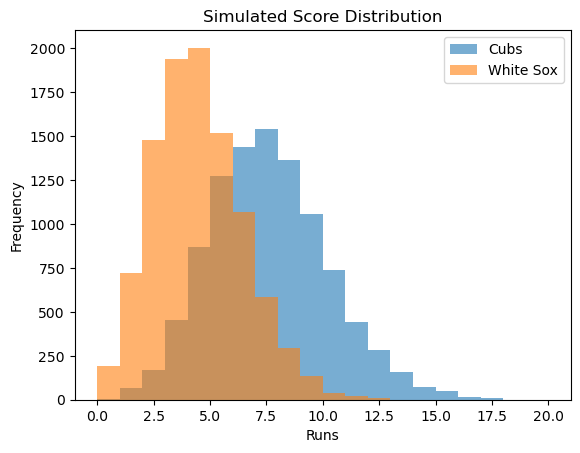

In [ ]:
plt.hist(sim_results['Cubs'], bins=range(0, max(sim_results['Cubs'])+2), alpha=0.6, label="Cubs")
plt.hist(sim_results['WhiteSox'], bins=range(0, max(sim_results['WhiteSox'])+2), alpha=0.6, label="White Sox")
plt.title("Simulated Score Distribution")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
# model2:This model uses each team’s average batting stats and pitcher ERA to estimate expected runs

In [25]:

df = pd.read_csv('/Users/lynettefu/Desktop/decision anlytics/player_stats_2024.csv')

def compute_team_features(df, team_name):
    batters = df[(df['team'] == team_name) & (df['avg'].notnull())]
    pitchers = df[(df['team'] == team_name) & (df['era'].notnull())]

    team_avg = batters['avg'].mean()
    team_hr = batters['hr'].sum()
    team_rbi = batters['rbi'].sum()
    team_era = pitchers['era'].mean()

    # Simple proxy for run-scoring power: mix of average + HR + RBI - ERA
    expected_runs = 30 * team_avg + 0.1 * team_hr + 0.05 * team_rbi - 0.5 * team_era
    return max(expected_runs, 1.0)  # Ensure Poisson λ is ≥ 1

# Simulate game outcomes using Poisson distribution
def simulate_game(lambda_cubs, lambda_sox, n=10000):
    cubs_sim = poisson.rvs(mu=lambda_cubs, size=n)
    sox_sim = poisson.rvs(mu=lambda_sox, size=n)

    results = {
        "Cubs Avg": np.mean(cubs_sim),
        "White Sox Avg": np.mean(sox_sim),
        "Cubs Win %": np.mean(cubs_sim > sox_sim),
        "White Sox Win %": np.mean(sox_sim > cubs_sim),
        "Draw %": np.mean(cubs_sim == sox_sim)
    }
    return results

# Compute expected scoring power
lambda_cubs = compute_team_features(df, "Cubs")
lambda_sox = compute_team_features(df, "White Sox")


In [26]:
# Run the simulation
results = simulate_game(lambda_cubs, lambda_sox, n=10000)

# Print results
print("Simulation-Based Prediction:")
for k, v in results.items():
    print(f"{k}: {v:.2f}")



Simulation-Based Prediction:
Cubs Avg: 22.25
White Sox Avg: 17.26
Cubs Win %: 0.76
White Sox Win %: 0.19
Draw %: 0.05


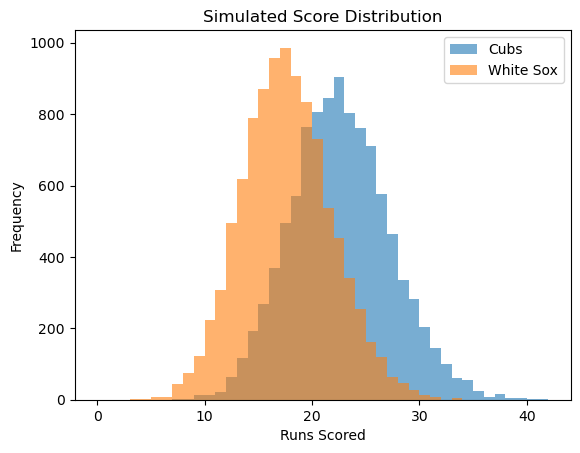

In [27]:
# visualize simulated score distribution
import matplotlib.pyplot as plt

cubs_sim = poisson.rvs(mu=lambda_cubs, size=10000)
sox_sim = poisson.rvs(mu=lambda_sox, size=10000)

plt.hist(cubs_sim, bins=range(0, max(cubs_sim)+2), alpha=0.6, label="Cubs")
plt.hist(sox_sim, bins=range(0, max(sox_sim)+2), alpha=0.6, label="White Sox")
plt.title("Simulated Score Distribution")
plt.xlabel("Runs Scored")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [20]:
injury_df = pd.read_csv('/Users/lynettefu/Desktop/decision anlytics/injury_replacements_2024.csv')


In [31]:
# model3:This model uses the injury report to adjust the expected runs based on player_injuries


In [29]:
injury_df = pd.read_csv('/Users/lynettefu/Desktop/decision anlytics/injury_replacements_2024.csv')


Avg Cubs Runs: 21.49
Avg White Sox Runs: 22.76
Cubs Win %: 0.40
White Sox Win %: 0.55
Draw %: 0.06


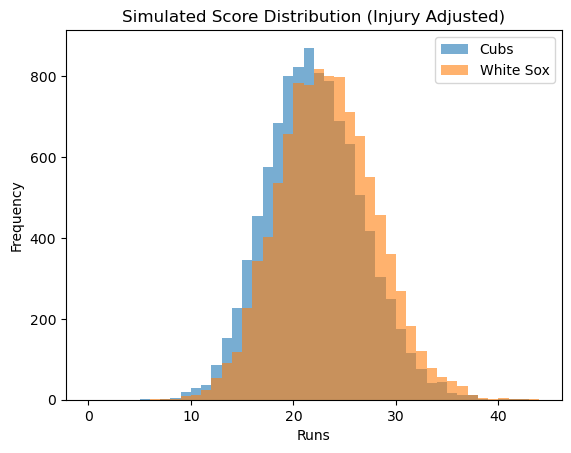

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

# Load player stats and injury replacement data
main_df = pd.read_csv('/Users/lynettefu/Desktop/decision anlytics/player_stats_2024.csv')

# Mark and drop injured players
injured_players = injury_df['injured_player'].tolist()
main_df['injured'] = main_df['player'].isin(injured_players)
main_df_filtered = main_df[~main_df['injured']].drop(columns=['injured'])

# Prepare replacement rows
replacement_rows = []
for _, row in injury_df.iterrows():
    replacement_rows.append({
        "team": row["team"],
        "player": row["replacement"],
        "position": row["position"],
        "avg": row["avg"],
        "hr": row["hr"],
        "rbi": row["rbi"],
        "era": row["era"]
    })
replacement_df = pd.DataFrame(replacement_rows)

# Final injury-aware team data
full_df = pd.concat([main_df_filtered, replacement_df], ignore_index=True)

# Compute expected scoring power
def compute_lambda(df, team):
    bat = df[(df['team'] == team) & (df['avg'].notnull())]
    pit = df[(df['team'] == team) & (df['era'].notnull())]
    team_avg = bat['avg'].mean()
    team_hr = bat['hr'].sum()
    team_rbi = bat['rbi'].sum()
    team_era = pit['era'].mean()
    
    # Custom formula: weighted offensive & defensive factors
    lambda_val = 30 * team_avg + 0.1 * team_hr + 0.05 * team_rbi - 0.5 * team_era
    return max(lambda_val, 1.0)

lambda_cubs = compute_lambda(full_df, "Cubs")
lambda_sox = compute_lambda(full_df, "White Sox")




In [32]:

# Simulation
def simulate(lambda1, lambda2, n=10000):
    sim1 = poisson.rvs(mu=lambda1, size=n)
    sim2 = poisson.rvs(mu=lambda2, size=n)
    return {
        "Avg Cubs Runs": np.mean(sim1),
        "Avg White Sox Runs": np.mean(sim2),
        "Cubs Win %": np.mean(sim1 > sim2),
        "White Sox Win %": np.mean(sim2 > sim1),
        "Draw %": np.mean(sim1 == sim2)
    }

results = simulate(lambda_cubs, lambda_sox, n=10000)

# Print results
for key, value in results.items():
    print(f"{key}: {value:.2f}")

Avg Cubs Runs: 21.55
Avg White Sox Runs: 22.87
Cubs Win %: 0.40
White Sox Win %: 0.54
Draw %: 0.06


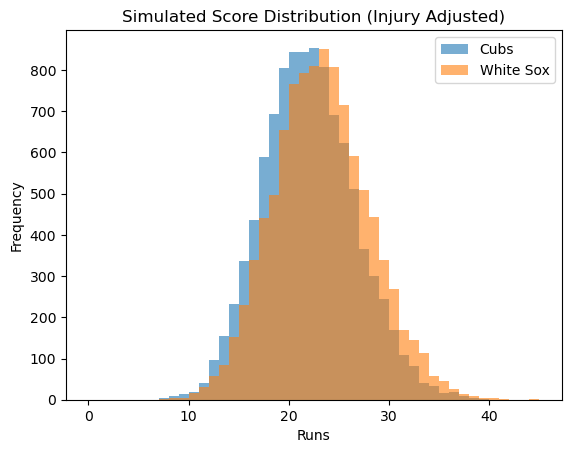

In [33]:

cubs_sim = poisson.rvs(mu=lambda_cubs, size=10000)
sox_sim = poisson.rvs(mu=lambda_sox, size=10000)
plt.hist(cubs_sim, bins=range(0, max(cubs_sim)+2), alpha=0.6, label="Cubs")
plt.hist(sox_sim, bins=range(0, max(sox_sim)+2), alpha=0.6, label="White Sox")
plt.title("Simulated Score Distribution (Injury Adjusted)")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.legend()
plt.show()